## Import Module

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='../../data',
                                           train = True, 
                                           transform = transforms.ToTensor(),
                                           download = True)

test_dataset = torchvision.datasets.MNIST(root='../../data',
                                           train = False, 
                                           transform = transforms.ToTensor())

Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw


Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw



Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw


Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
train_loader = torch.utils.data.DataLoader(dataset= train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset= test_dataset,
                                           batch_size = batch_size)

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)

        self.relu = nn.ReLU()

    def forward(self, x):
        output = self.fc1(x)
        output = self.relu(output)
        output = self.fc2(output)
        
        return output

In [ ]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device) # 모델을 gpu서버에서 돌릴것

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
total_step = len(train_loader)
total_step

600

In [ ]:
for epoch in range(num_epochs):

    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = loss_function(outputs, labels)
     
        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'EPOCH: [{epoch+1}/{num_epochs}] STEP: [{i+1}/{len(train_loader)}] LOSS: {loss.item():.4f}')


EPOCH: [1/5] STEP: [100/600] LOSS: 0.1846
EPOCH: [1/5] STEP: [200/600] LOSS: 0.2082
EPOCH: [1/5] STEP: [300/600] LOSS: 0.0747
EPOCH: [1/5] STEP: [400/600] LOSS: 0.1790
EPOCH: [1/5] STEP: [500/600] LOSS: 0.2067
EPOCH: [1/5] STEP: [600/600] LOSS: 0.0860
EPOCH: [2/5] STEP: [100/600] LOSS: 0.2375
EPOCH: [2/5] STEP: [200/600] LOSS: 0.1099
EPOCH: [2/5] STEP: [300/600] LOSS: 0.1806
EPOCH: [2/5] STEP: [400/600] LOSS: 0.0594
EPOCH: [2/5] STEP: [500/600] LOSS: 0.1614
EPOCH: [2/5] STEP: [600/600] LOSS: 0.1165
EPOCH: [3/5] STEP: [100/600] LOSS: 0.0608
EPOCH: [3/5] STEP: [200/600] LOSS: 0.0765
EPOCH: [3/5] STEP: [300/600] LOSS: 0.0765
EPOCH: [3/5] STEP: [400/600] LOSS: 0.0871
EPOCH: [3/5] STEP: [500/600] LOSS: 0.0695
EPOCH: [3/5] STEP: [600/600] LOSS: 0.1170
EPOCH: [4/5] STEP: [100/600] LOSS: 0.0516
EPOCH: [4/5] STEP: [200/600] LOSS: 0.0919
EPOCH: [4/5] STEP: [300/600] LOSS: 0.0391
EPOCH: [4/5] STEP: [400/600] LOSS: 0.0385
EPOCH: [4/5] STEP: [500/600] LOSS: 0.0261
EPOCH: [4/5] STEP: [600/600] LOSS:

In [ ]:
# 이걸 쓰지 않으면 back propagation을 하기 위한 메모리를 확보하기때문에 메모리를 낭비하게 된다.
with torch.no_grad(): # 미분을 안한다 -> 학습하지 않겠다.
    correct = 0
    total = 0

    for images, labels in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)

        outputs = model(images)

        _, predicted = torch.max(outputs, 1) # outputs : (100, 10)
        total += labels.size(0) # 100
        correct += (predicted == labels).sum().item()
print('Accuracy of the Network in the Test Images : {}'.format(100 * correct/total))

torch.save(model.state_dict(), 'model.ckpt')

Accuracy of the Network in the Test Images : 97.64


tensor(8, device='cuda:0')
tensor(9, device='cuda:0')
tensor(0, device='cuda:0')
tensor(1, device='cuda:0')
tensor(0, device='cuda:0')
tensor(3, device='cuda:0')
tensor(4, device='cuda:0')
tensor(5, device='cuda:0')
tensor(6, device='cuda:0')
tensor(7, device='cuda:0')


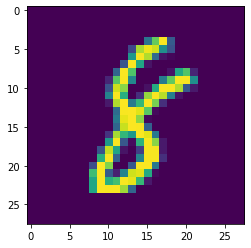

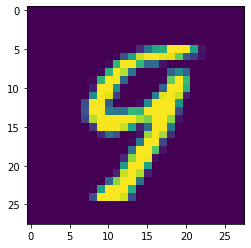

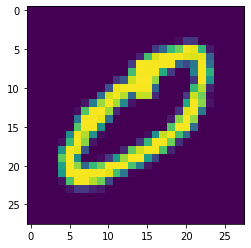

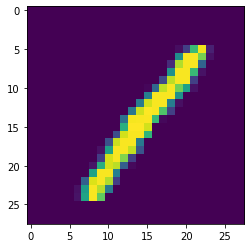

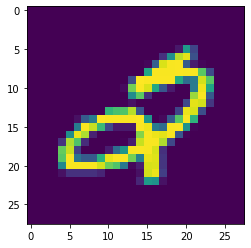

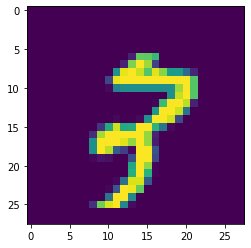

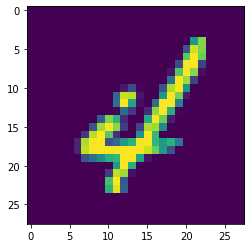

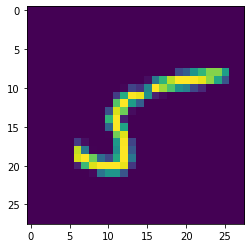

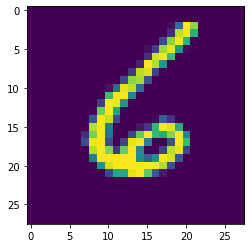

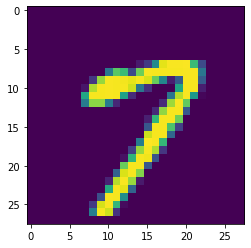

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(10):
    plt.imshow(images[i].cpu().numpy().reshape(28,28))
    plt.figure()
    print(outputs[i].argmax())